## Exploratory Data Analysis of Retail Data
The main of the project is to provide data analysis and visualization of retail dataset.

Table of contents:
1. Importing Data and General Inspection
2. Data Cleaning
3. Data Visualization

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

## 1. Importing Data and General Inspection 
Using data_retail dataset from dqlab and perform general inspections

In [2]:
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [3]:
print('Dataset info: ')
print(df.info())

Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB
None


There are 100.000 records of the data, with 7 columns of int type, and 1 column of object type. There isn't any null values.

---

## 2. Data Cleaning


In [4]:
# Transform 'First_Transaction' and 'Last_Transaction' columns from int to datetime for a better use of analysis

df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [5]:
# Drop the columns that will not be used in this analysis, which are 'no' and 'Row_Num' columns
df.drop(['no','Row_Num'], axis = 1, inplace = True)

In [6]:
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25


In [7]:
print('Dataset info:')
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer_ID                 100000 non-null  int64         
 1   Product                     100000 non-null  object        
 2   First_Transaction           100000 non-null  datetime64[ns]
 3   Last_Transaction            100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount  100000 non-null  int64         
 5   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 4.6+ MB
None


Now there are 6 columns with 3 columns of int, 2 columns of datetime, and 1 column of object type.

---

## 3. Classify Churn Customer

In [8]:
print('The latest transaction:',max(df['Last_Transaction']))

The latest transaction: 2019-02-01 23:57:57.286000013


In [9]:
# Classify churn customers who didn't have any transaction in the last 6 months 
# Add 'is_churn' column to the dataframe
df.loc[df['Last_Transaction'] <= '2018-08-01','is_churn']=1
df.loc[df['Last_Transaction'] > '2018-08-01','is_churn']=0

In [10]:
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,0.0
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,0.0
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,0.0
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,0.0
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,0.0


---

## 4. Data Visualization


**a. Customer acquisition by year**

In [11]:
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

In [12]:
df_year1 = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year1

Year_First_Transaction
2013     1007
2014     4954
2015    11235
2016    17656
2017    31828
2018    30327
2019     2993
Name: Customer_ID, dtype: int64

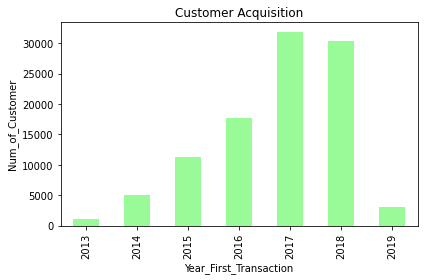

In [13]:
df_year1.plot(x=df['Year_First_Transaction'], y=df['Customer_ID'], kind='bar', title='Customer Acquisition', color='palegreen')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')

plt.tight_layout()
plt.show()

The bar chart shows that 2017 was the year with the highest customer acquisition with 31,828 customers.
The acquisition tends to increase from year to year, but there's a slight decrease (-4.71%) from 2017 to 2018.

**b. Transactions by year**

In [14]:
df_year2 = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year2

Year_First_Transaction
2013     23154
2014    165494
2015    297445
2016    278707
2017    299199
2018     99989
2019      5862
Name: Count_Transaction, dtype: int64

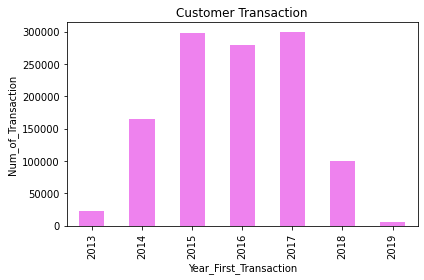

In [15]:
plt.clf()
df_year2.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Customer Transaction', color='violet')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

This chart aims to give a visualization of how many transactions happened in a customer's first-year transaction. Year 2015-2017 are the highest first-year transactions happened.

**c.Comparison between customer acquisition and transaction**

In [16]:
df.groupby('Year_First_Transaction', as_index=False).agg({'Customer_ID':'count','Count_Transaction': 'sum'})

,Year_First_Transaction,Customer_ID,Count_Transaction
0,2013,1007,23154
1,2014,4954,165494
2,2015,11235,297445
3,2016,17656,278707
4,2017,31828,299199
5,2018,30327,99989
6,2019,2993,5862


<Figure size 432x288 with 0 Axes>

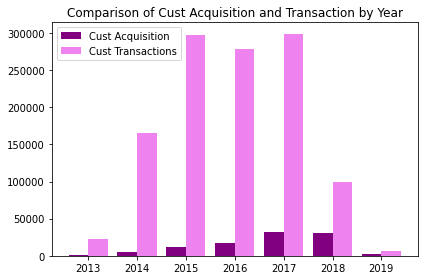

In [17]:
plt.clf()
fig, ax = plt.subplots()
bar_width = 0.4
X = np.arange(7)

plt.bar(X, df_year1 , bar_width, label='Cust Acquisition', color='purple')
plt.bar(X + bar_width, df_year2, bar_width, label='Cust Transactions', color='violet')
plt.xticks(X + (bar_width/2) , ("2013", "2014", "2015", "2016", "2017", "2018", "2019"))
plt.title('Comparison of Cust Acquisition and Transaction by Year')
plt.legend()
plt.tight_layout()
plt.show()

This graph aims to visualize the comparison between customer acquisition (customer_Id) and customer transaction (count_transaction).
Year 2018 shows a big decrease i transactions (-66.58%) from 299,199 to 99,989, even though the customer acquisition in 2018 was quite well. This is quite concerning since 2014, 2015, and 2016 which have a lower customer acquisition than 2018, able to gain a bigger amount of transactions compared to 2018.

**d. Total transaction of products by year**

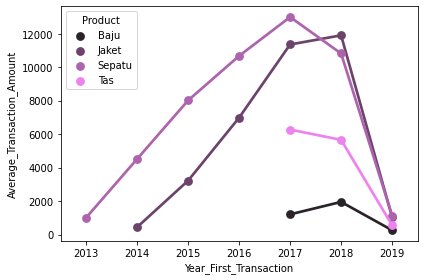

In [18]:
plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).count().reset_index(),
              x='Year_First_Transaction',  
              y='Average_Transaction_Amount',
              hue='Product', color = 'violet')
plt.tight_layout()
plt.show()

This line chart shows the average customer's first year transaction in every products 

**e. Count_Transaction Distribution**

In [19]:
def func(row):
	if row['Count_Transaction'] == 1:
		val = '1'
	elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
		val ='2 - 3'
	elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
		val ='4 - 6'
	elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
		val ='7 - 10'
	else:
		val ='>10'
	return val

In [20]:
df['Count_Transaction_Group'] = df.apply(func, axis=1)
df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year

Count_Transaction_Group
1         49255
2 - 3     14272
4 - 6     12126
7 - 10     2890
>10       21457
Name: Customer_ID, dtype: int64

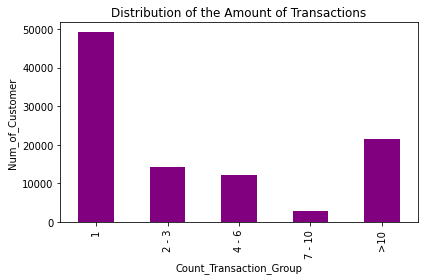

In [21]:
plt.clf()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Distribution of the Amount of Transactions', color='purple')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

This chart aims to show the amount of transaction distribution by the number of customers. It is shown that 49,255 customers having only 1 transaction. By this, the company should retain the customers so they won't leave after having a transaction.

**f. Avg Transactions Amount by the Num of Customers**

In [22]:
def f(row):
	if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
		val ='1. 100K - 250K'
	elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
		val ='2. 250K - 500K'
	elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
		val ='3. 500K - 750K'
	elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
		val ='4. 750K - 1M'
	elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
		val ='5. 1M - 2.5M'
	elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
		val ='6. 2.5M - 5M'
	elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
		val ='7. 5M - 10M'
	else:
		val ='8. >10M'
	return val

In [23]:
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)
df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year

Average_Transaction_Amount_Group
1. 100K - 250K     4912
2. 250K - 500K    18857
3. 500K - 750K    15171
4. 750K - 1M      12298
5. 1M - 2.5M      32819
6. 2.5M - 5M       9027
7. 5M - 10M        3689
8. >10M            3227
Name: Customer_ID, dtype: int64

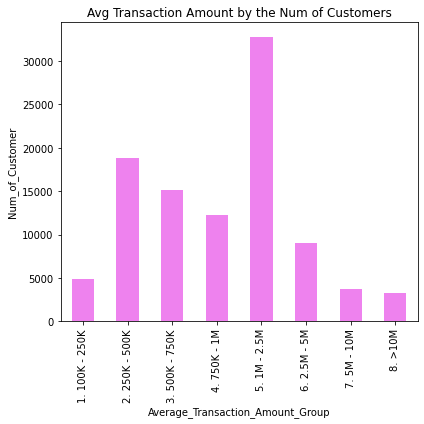

In [24]:
plt.clf()

df_year.plot(figsize=(6,6),x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Avg Transaction Amount by the Num of Customers',color='violet')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

The chart shows the distribution of the average of transactions amount by the number of customers. It is showed that the highest transaction amount was 1M-2.5M IDR with more than 32819 customers.

**g. Churned customer proportion for each product**

<Figure size 432x288 with 0 Axes>

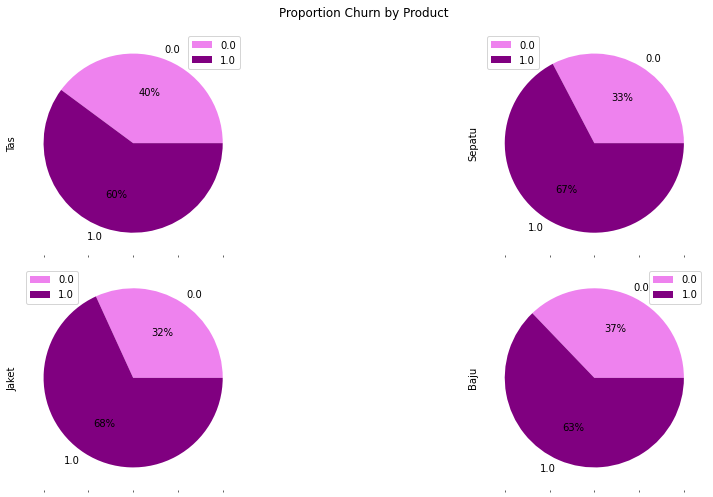

In [25]:
plt.clf()

# Melakukan pivot data
df_piv = df.pivot_table(index='is_churn',
                        columns='Product',
                        values='Customer_ID',
                        aggfunc='count',
                        fill_value=0)

# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index

# Plot pie chartnya
colors = ['violet','purple']
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(16, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product',
                colors=colors)
plt.tight_layout()
plt.show()

The pie chart aims to show the proportion of churned customer after buying a product. The churned percentage is about 60-68% in each product, means that the variety of product doesn't affect the percentage of the churned customer. The company should perform some improvements to the products to decrease the percentage of the churned customer.

In [26]:
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group,Average_Transaction_Amount_Group
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,0.0,2016,2018,>10,5. 1M - 2.5M
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,0.0,2014,2018,>10,5. 1M - 2.5M
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,0.0,2017,2019,>10,2. 250K - 500K
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,0.0,2017,2019,>10,3. 500K - 750K
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,0.0,2015,2018,>10,5. 1M - 2.5M
